In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [4]:
task1_l5 = pd.read_csv('/home/jupyter-l.fedoseeva-12/Mat_stats/Lesson_5/5_task_1.csv')

In [5]:
task2_l5 = pd.read_csv('/home/jupyter-l.fedoseeva-12/Mat_stats/Lesson_5/5_task_2.csv')

In [6]:
task1_l5.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [20]:
task1_l5.dtypes

id         int64
group     object
events     int64
dtype: object

In [7]:
task2_l5.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [29]:
group_A = task1_l5.query('group == "A"').events

In [30]:
group_A

0       14
1       41
2       30
3       37
4       38
        ..
9995    25
9996    25
9997    30
9998    21
9999    21
Name: events, Length: 10000, dtype: int64

In [31]:
group_B = task1_l5.query('group == "B"').events

In [32]:
group_C = task1_l5.query('group == "C"').events

In [34]:
stats.levene(group_A, group_B, group_C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. Для воспроизводимости результата используйте параметр random_state=17 в методе sample.

In [38]:
task1_l5

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [50]:
task1_l5_A_sh = task1_l5[task1_l5['group'] == 'A']['events'].sample(1000, random_state=17)

In [41]:
task1_l5_B_sh = task1_l5[task1_l5['group'] == 'B']['events'].sample(1000, random_state=17)

In [42]:
task1_l5_C_sh = task1_l5[task1_l5['group'] == 'C']['events'].sample(1000, random_state=17)

In [49]:
stats.shapiro(task1_l5_A_sh)

(0.9973153471946716, 0.09609563648700714)

In [44]:
stats.shapiro(task1_l5_B_sh)

(0.9980798363685608, 0.31768906116485596)

In [45]:
stats.shapiro(task1_l5_C_sh)

(0.9981185793876648, 0.3359004259109497)

Самое время провести тест! 

In [57]:
task1_l5_ttest_A = task1_l5.query('group == "A"')['events']

In [58]:
task1_l5_ttest_B = task1_l5.query('group == "B"')['events']

In [59]:
task1_l5_ttest_C = task1_l5.query('group == "C"')['events']

In [62]:
stats.f_oneway(task1_l5_ttest_A, task1_l5_ttest_B, task1_l5_ttest_C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

In [64]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

In [67]:
MultiComp = MultiComparison(task1_l5.events, task1_l5.group)
print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. Соотнесите графики распределения и экспериментальные группы:

In [69]:
task2_l5

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


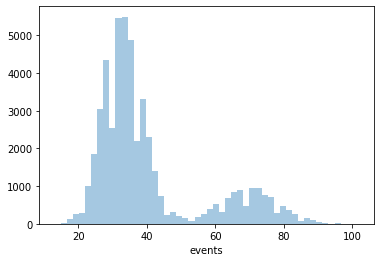

In [73]:
sns.distplot(task2_l5.query('group == "test"')['events'], kde=False)

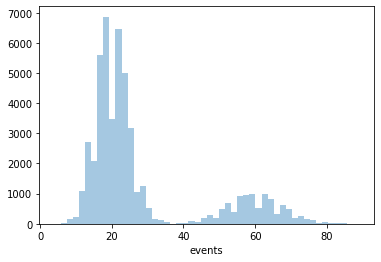

In [74]:
sns.distplot(task2_l5.query('group == "control"')['events'], kde=False)

Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [78]:
task2_l5.query('group == "control" & segment == "high"')['events'].mean()

59.9708

In [79]:
task2_l5.query('group == "control" & segment == "high"')['events'].median()

60.0

In [84]:
task2_l5.query('group == "control" & segment == "high"')['events'].std().round(2)

7.81

In [81]:
task2_l5.query('group == "control" & segment == "low"')['events'].mean()

20.031575

In [82]:
task2_l5.query('group == "control" & segment == "low"')['events'].median()

20.0

In [83]:
task2_l5.query('group == "control" & segment == "low"')['events'].std()

4.473575565622373

Проведите тест, а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

In [92]:
task2_l5

,id,group,segment,events,combination
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high
2,68719,test,high,80.0,test/high
3,50399,test,high,80.0,test/high
4,95613,test,high,78.0,test/high
...,...,...,...,...,...
99995,60695,control,low,15.0,control/low
99996,5934,control,low,16.0,control/low
99997,30046,control,low,22.0,control/low
99998,26474,control,low,21.0,control/low


In [91]:
task2_l5['combination'] = task2_l5.group + '/' + task2_l5.segment

In [94]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'events ~ segment + group + segment:group'
model = ols(formula, task2_l5).fit()
aov_table = anova_lm(model, typ=2)

In [95]:
print(aov_table)

                     sum_sq       df              F         PR(>F)
segment        2.362480e+07      1.0  689756.377484   0.000000e+00
group          3.837195e+06      1.0  112031.864119   0.000000e+00
segment:group  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual       3.424956e+06  99996.0            NaN            NaN


In [98]:
print(pairwise_tukeyhsd(task2_l5.events, groups=task2_l5.combination)).summary()

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


AttributeError: 'NoneType' object has no attribute 'summary'

Визуализируйте результаты теста и заполните пропуски:

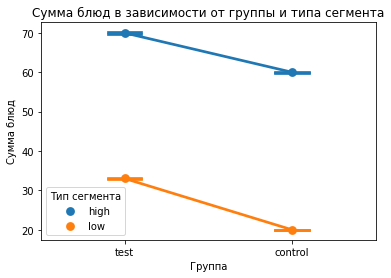

In [99]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = task2_l5, capsize = .2)
plt.title('Сумма блюд в зависимости от группы и типа сегмента')
plt.xlabel('Группа')
plt.ylabel('Сумма блюд')
plt.legend(title = 'Тип сегмента')